In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

In [17]:
# Import Data 
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [18]:
stockList = ['CBA','BHP','TLS','NAB','WBC','STO']
stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

In [19]:
meanReturns, covMatrix = get_data(stocks,startDate,endDate)

[*********************100%***********************]  6 of 6 completed


In [24]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

## Monte Carlo Simulation of a Stock Portfolio

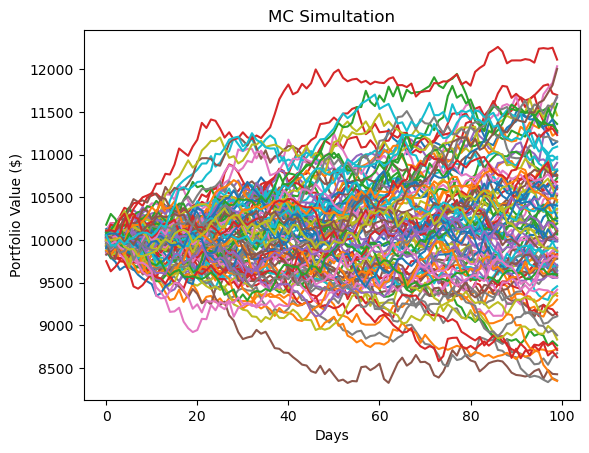

In [34]:
n = 100 #number of simulations 
T = 100 #timeframe in days

meanM = np.full(shape=(T,len(weights)),fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T,n),fill_value = 0.0)

initialPortfolio = 10000

for m in range(0,n):
    Z = np.random.normal(size=(T,len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L,Z) #creation of the matrix of the return of the asset for each asset each day
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio #matrix of the evolution of the price of the portfolio for n simulation

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC Simultation')
plt.show()
